<a href="https://colab.research.google.com/github/habaccc/Python_study/blob/main/ml06_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

# Wine 데이터 셋

white, red 와인 분류

In [4]:
# csv 파일 github url
wine_csv = 'https://github.com/JakeOh/20230228_itwill_java140_lab_python/raw/main/wine.csv'

In [5]:
wine = pd.read_csv(wine_csv)

In [6]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


## 데이터 탐색

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [8]:
wine['class'].unique() #> class 컬럼 - 카테고리 변수

array([0., 1.])

In [9]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

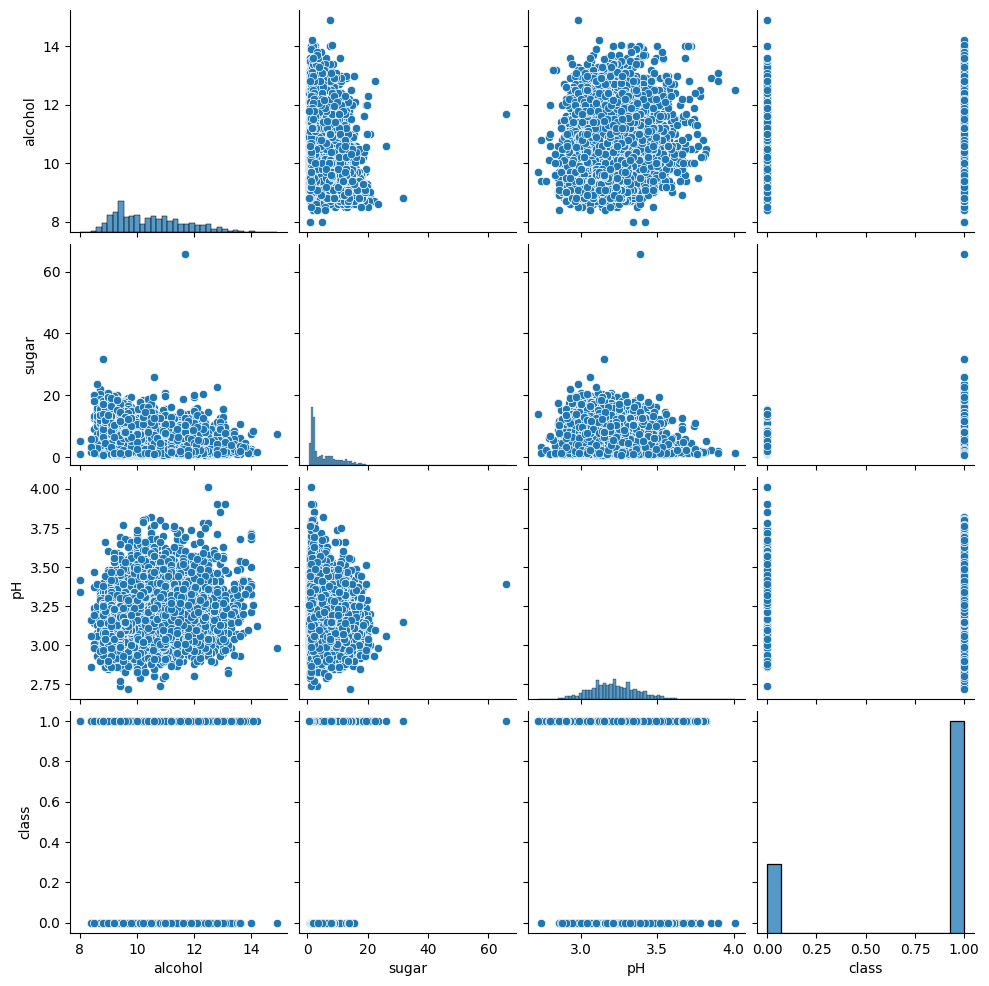

In [10]:
sns.pairplot(data=wine)
plt.show()

## 데이터프레임을 특성 배열, 타겟 배열로 분리


In [11]:
X = wine.iloc[:, :-1].values  # 특성 (2차원) 배열
y = wine['class'].values  # 타겟 (1차원) 배열

In [12]:
X.shape  # 특성 배열의 shape = (n_samples, n_features)

(6497, 3)

In [13]:
y.shape  # 타겟 배열의 shape = (n_samples,)

(6497,)

In [14]:
feature_names = ['alcohol', 'sugar', 'ph']  # 특성의 이름들
target_names = ['red', 'white']  # 타겟의 이름들(0: red, 1: white)

# 훈련, 검증, 테스트 셋 분리

In [15]:
# 훈련 셋, 테스트 셋 분리
X_tr_total, X_te, y_tr_total, y_te = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=42,
                                                      stratify=y)

In [16]:
X_tr_total.shape, X_te.shape, y_tr_total.shape, y_te.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [17]:
np.unique(y_tr_total, return_counts=True)

(array([0., 1.]), array([1279, 3918]))

In [18]:
np.unique(y_te, return_counts=True)

(array([0., 1.]), array([320, 980]))

In [19]:
# 훈련 셋을 다시 훈련 셋과 검증 셋으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_total, y_tr_total,
                                            test_size=0.2,
                                            random_state=42,
                                            stratify=y_tr_total)

In [20]:
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((4157, 3), (1040, 3), (4157,), (1040,))

# Decision Tree(의사결정 나무) 분류

## 모델 생성

In [21]:
tree_clf = DecisionTreeClassifier()

## 모델 훈련(데이터학습)

In [22]:
tree_clf.fit(X_tr, y_tr)

DecisionTreeClassifier()

## 훈련 셋 예측 결과 평가

In [23]:
y_tr_pred = tree_clf.predict(X_tr)

In [24]:
accuracy_score(y_tr, y_tr_pred)

0.9980755352417608

In [26]:
confusion_matrix(y_tr, y_tr_pred)

array([[1022,    1],
       [   7, 3127]])

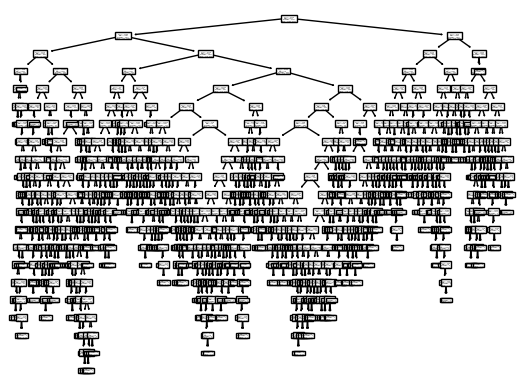

In [27]:
plot_tree(tree_clf)
plt.show()

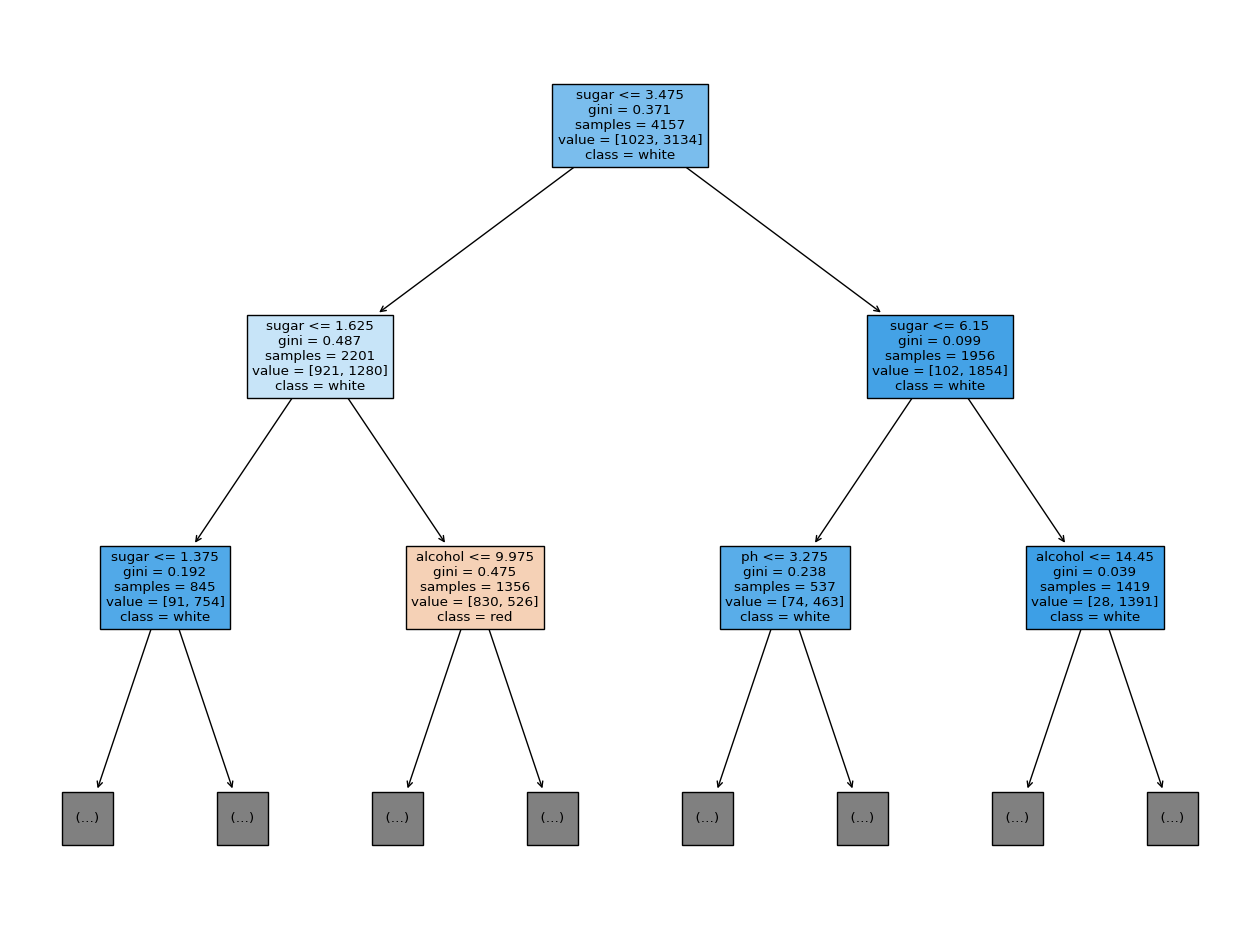

In [29]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2, feature_names=feature_names, class_names=target_names,
          filled=True)
plt.show()

* Decision Tree의 장점:
 * 특성들의 스케일을 변환할 필요가 없음.
 * 결과를 이해하기 쉬움.
* Decision Tree의 단점:
 * 과대적합(overfitting)되기 쉬움.
  * 규제를 적용하거나 하이퍼파라미터 튜닝을 통해서 과대적합을 해결해야함.

## 검증 셋 예측 결과 평가

In [30]:
y_val_pred = tree_clf.predict(X_val)

In [31]:
accuracy_score(y_val, y_val_pred)

0.8798076923076923

In [32]:
confusion_matrix(y_val, y_val_pred)

array([[195,  61],
       [ 64, 720]])

# 하이퍼파라미터 튜닝

* DecisionTreeClassfier 생성자의 파라미터 max_depth를 1 ~ 20까지 바꿔가면서
  * DecisionTree 모델 생성, 훈련
  * 훈련 셋 정확도 저장
  * 검증 셋 정확도 저장

* max_depth에 따른 훈련/검증 셋의 정확도 그래프 시각화

In [42]:
train_scores = [] # 훈련 셋 정확도들을 저장할 리스트
val_scores = [] # 검증 셋 정확도들을 저장할 리스트

depths = np.arange(1, 21) # [1, 2, 3, ..., 19, 20]
for d in depths:
  tree_clf = DecisionTreeClassifier(max_depth=d) # 모델 생성
  tree_clf.fit(X_tr, y_tr) # 모델 훈련
  tr_acc = tree_clf.score(X_tr, y_tr) # 훈련 셋 정확도
  train_scores.append(tr_acc)
  val_acc = tree_clf.score(X_val, y_val) # 검증 셋 정확도
  val_scores.append(val_acc)

In [43]:
print(train_scores)
print(val_scores)

[0.7539090690401732, 0.8270387298532595, 0.8272792879480394, 0.8636035602598028, 0.8691363964397402, 0.8775559297570363, 0.8888621602116912, 0.8989656001924464, 0.9129179696896801, 0.9314409429877315, 0.9451527543901852, 0.958624007697859, 0.9699302381525138, 0.9824392590810681, 0.9862881885975463, 0.9923021409670435, 0.9954293961991821, 0.9959105123887418, 0.9971133028626413, 0.9980755352417608]
[0.7538461538461538, 0.8298076923076924, 0.8298076923076924, 0.864423076923077, 0.875, 0.8682692307692308, 0.8625, 0.8625, 0.8586538461538461, 0.8634615384615385, 0.8586538461538461, 0.8625, 0.8730769230769231, 0.8673076923076923, 0.8711538461538462, 0.8759615384615385, 0.8711538461538462, 0.8778846153846154, 0.8740384615384615, 0.8711538461538462]


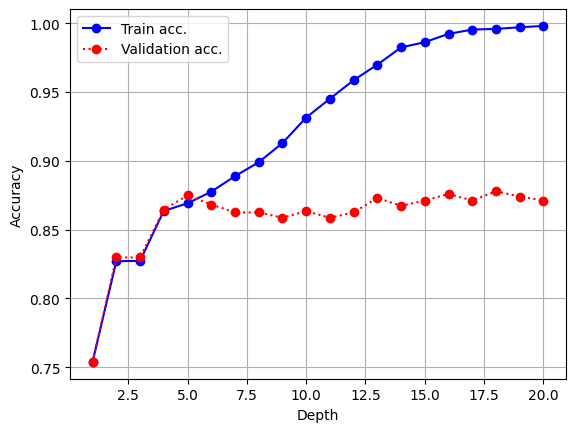

In [45]:
plt.plot(depths, train_scores, 'bo-', label='Train acc.')
plt.plot(depths, val_scores, 'ro:', label='Validation acc.')

plt.grid()
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')

plt.show()

# 훈련셋과 검증셋의 차이가 심함 - overfitting

위 결과를 보면 의사결정 나무의 max_depth를 6보다 크게 하는 것은 검증 셋의 정확도를 높이지 못하고 과대적합(overfitting)만 더 커지는 결과를 줌. -> max_depth의 값이 6보다 크면 일반화 성능이 떨어짐.

# 교차 검증(Cross Validation)

In [47]:
X_tr_total.shape

(5197, 3)

In [48]:
# 전체 데이터를 훈련/데스트 셋으로 나누고, 훈련 셋(X_tr_total, y_tr_total)을 사용해서 교차 검증
# 교차 검증에서 사용할 머신 러닝 모델 생성
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

In [50]:
cv = cross_validate(estimator=tree_clf,         # 머신 러닝 모델
                    X=X_tr_total, y=y_tr_total, # X=특성 배열, y=타겟 배열
                    cv=5,                       # 교차 검증 fold 개수
                    n_jobs=-1,                  # 병렬 작업수
                    return_train_score=True)    # 훈련 셋 점수 리턴 여부
# 평가 점수(score)
# (1) 분류: 정확도(accuracy)
# (2) 회귀: 결정 계수(R2 score)

In [54]:
cv #> dict
# fit_time:훈련 시간
# score_time: 평가 시간
# test_score: 검증 셋 점수(정확도)
# train_score: 훈련 셋 점수(정확도)

{'fit_time': array([0.00845838, 0.00820994, 0.00771332, 0.01132703, 0.01419902]),
 'score_time': array([0.00170565, 0.00170255, 0.00180173, 0.00171161, 0.00194192]),
 'test_score': array([0.87019231, 0.86634615, 0.84889317, 0.86429259, 0.86044273]),
 'train_score': array([0.87466923, 0.8811643 , 0.88455988, 0.88095238, 0.88648389])}

In [55]:
# 검증 셋 점수들의 평균 -> 한번도 학습되지 않은 테스트 셋의 점수와 비슷하거나 조금 높을 수 있음.
np.mean(cv['test_score'])

0.8620333900940252

In [56]:
tree_clf.fit(X_tr_total, y_tr_total) # 전체 훈련 셋을 학습
tree_clf.score(X_te, y_te) # 한번도 학습되지 않은 테스트 셋에서 점수 계산

0.8484615384615385